# ***Engr.Muhammad Javed***

In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sbn

df = sbn.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
df.shape

(244, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Text(0.5, 1.0, 'Total Bill')

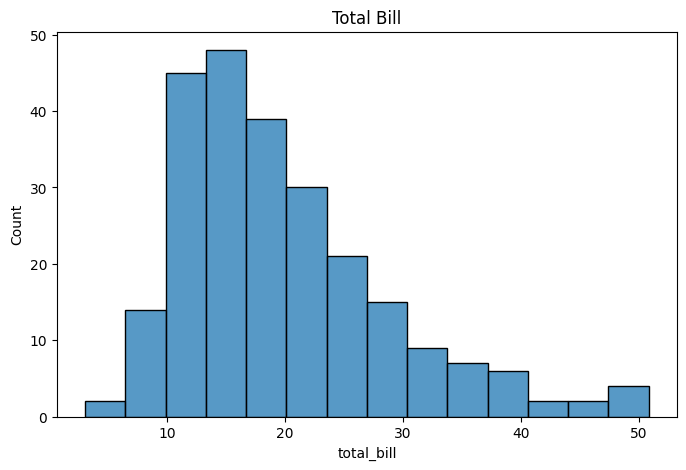

In [12]:
plt.figure(figsize=(8,5))
sbn.histplot(df.total_bill)
plt.title("Total Bill")

Text(0.5, 1.0, 'Tip')

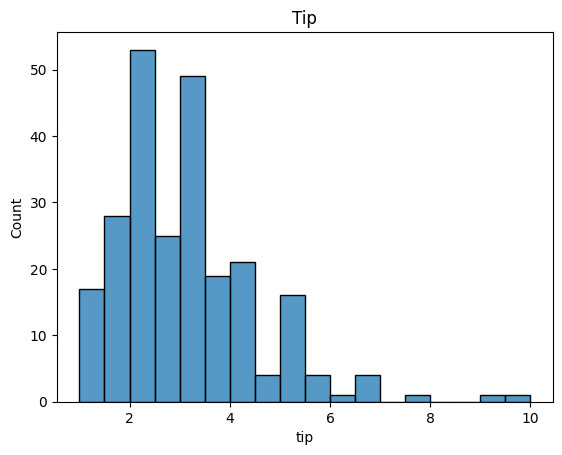

In [13]:
sbn.histplot(df["tip"])
plt.title("Tip")

Text(0.5, 1.0, 'Tip according to gender')

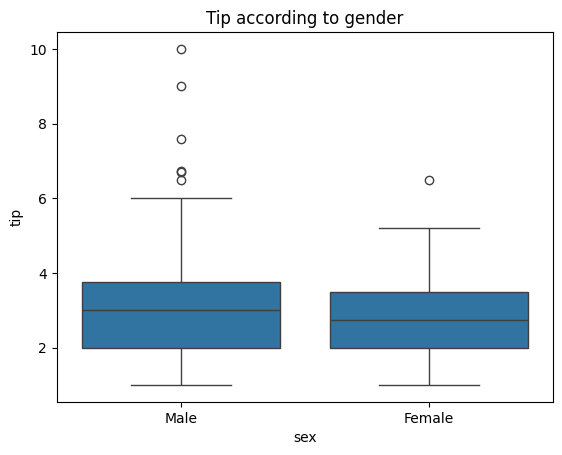

In [16]:
sbn.boxplot(x="sex", y="tip", data=df)
plt.title("Tip according to gender")

<Axes: xlabel='day', ylabel='Count'>

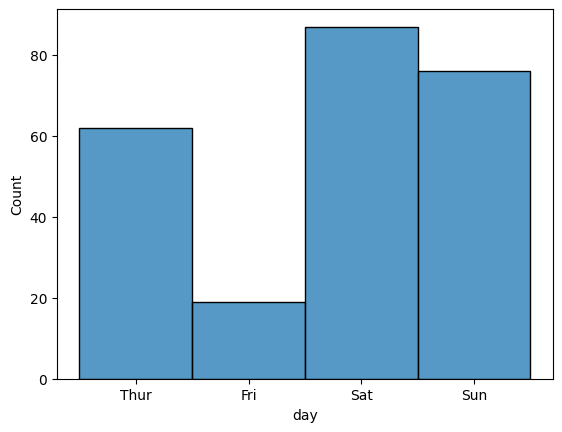

In [20]:
sbn.histplot(df.day)

Text(0.5, 1.0, 'Number of visits per day')

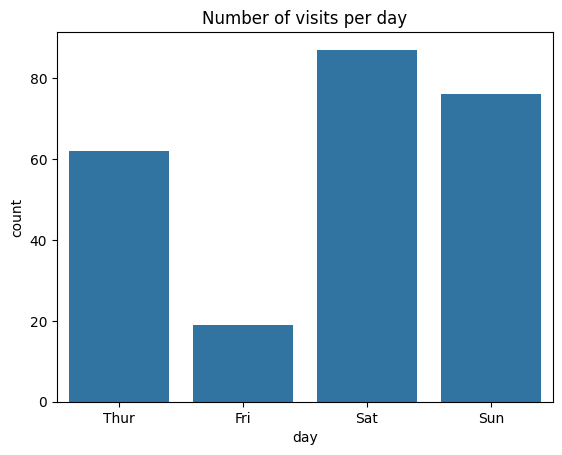

In [21]:
sbn.countplot(x="day",data=df)
plt.title("Number of visits per day")

Text(0.5, 1.0, 'Visits by gender')

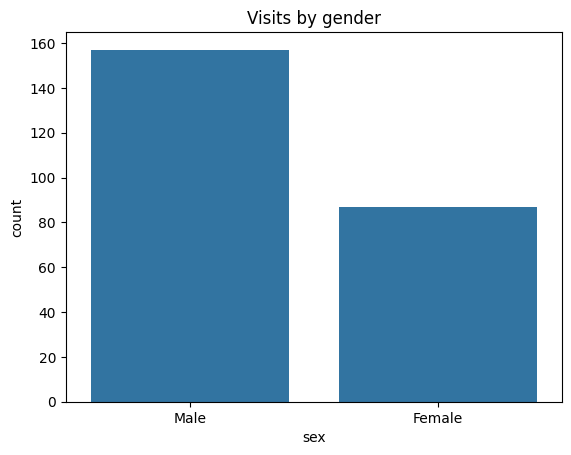

In [23]:
sbn.countplot(x="sex",data=df)
plt.title("Visits by gender")

In [ ]:
sbn.heatmap(data=df.corr(), annot=True, cmap="coolwarm")

## making new dataframe which contains only numeric columns

In [31]:
df2 = df.select_dtypes(include="number")
df2.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


<Axes: >

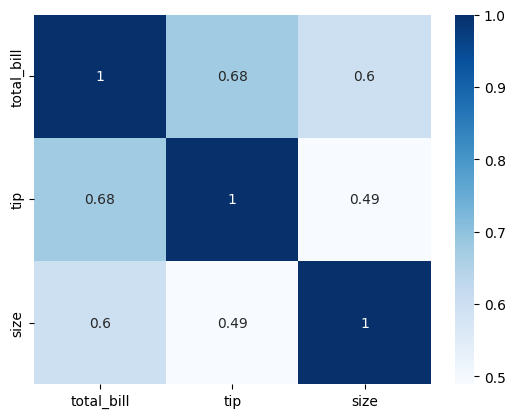

In [28]:
sbn.heatmap(df2.corr(), annot=True, cmap="Blues")

In [42]:
df["tip_percentage"] = (df.tip/df.total_bill)*100  # feature enineering: adding new feature in dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94%,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68%,14.680765


<Axes: xlabel='day', ylabel='tip_percentage'>

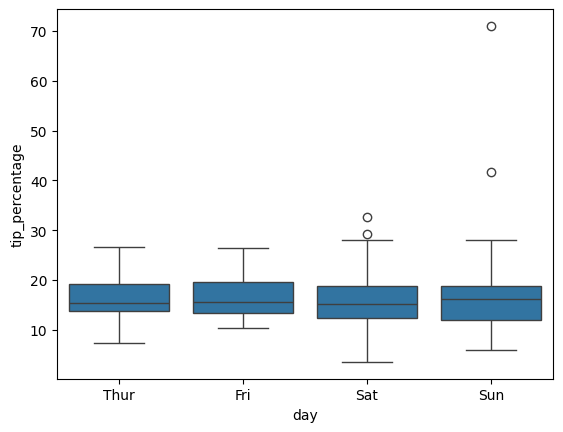

In [43]:
sbn.boxplot(x="day",y="tip_percentage",data=df)

In [46]:
df["tip_percent"] = df2["tip_percentage"].round(2).astype(str) + "%"
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94%,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05%,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66%,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98%,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68%,14.680765


In [45]:
average_tip_by_smoker = df.groupby("smoker")["tip_percentage"].mean()
average_tip_by_smoker

C:\Users\DELL\AppData\Local\Temp\ipykernel_7240\3422499712.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_tip_by_smoker = df.groupby("smoker")["tip_percentage"].mean()


smoker
Yes    16.319604
No     15.932846
Name: tip_percentage, dtype: float64

In [50]:
bill_according_time = df.groupby("time")["total_bill"].mean()
bill_according_time

C:\Users\DELL\AppData\Local\Temp\ipykernel_7240\2412395423.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bill_according_time = df.groupby("time")["total_bill"].mean()


time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

<Axes: xlabel='size', ylabel='tip_percentage'>

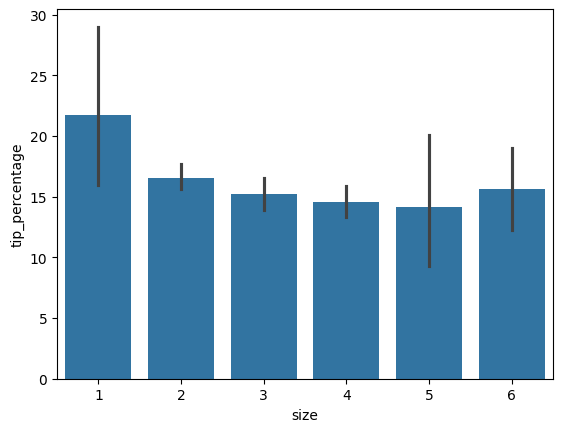

In [51]:
sbn.barplot(x="size", y="tip_percentage", data=df)